# Team 5 - Global Terrorism

![](https://www.start.umd.edu/gtd/images/START_GlobalTerrorismDatabase_TerroristAttacksConcentrationIntensityMap_45Years.png)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Use `encoding ='ISO-8859-1'` when reading the .csv file
- There are many columns that are not really helpful for us. Can you identify and drop them?
- Can you draw a map of terrorism event locations?
- And more...

In [0]:
# Since we store our data in google drive, let's mount drive and access it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# ValueError: cannot set WRITEABLE flag to True of this array

# This error appear if we try to read from hdf , seems like incompatible version
!pip install numpy==1.15.0

In [0]:
# Hope downgrade numpy worth
# Well here we go again, let's run all previous cell
# Since i already delete all previous cell 
# Because it's a pain to run everything again and got stuck to error cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

# file_path = '/content/drive/My Drive/terrorism.csv'
# gbtm_data = pd.read_csv(file_path, encoding ='ISO-8859-1')

# gbtm_data.to_hdf('/content/drive/My Drive/terrorism.h5', 'data')
gbtm_data_hdf = pd.read_hdf('/content/drive/My Drive/terrorism.h5')

In [0]:
# Seems like no more problem, hope downgrade numpy is worth it
gbtm_data_hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 188.5+ MB


In [0]:
gbtm_data_hdf.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [0]:
# Let's see how many NAN we have
gbtm_data_hdf.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [0]:
# Oh, holy, missing a damn lot!!! clean this dataset??? 
# Drop na will significantly affect the result to the point of having no data at all
# Fill na??? with what value???
# Well let's just say the best approach for now is to let the dataset as it be
# Maybe stick with exploring a bit longer
gbtm_data_hdf.shape

(181691, 135)

In [0]:

print([col for col in gbtm_data_hdf.columns])


['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [0]:
# Well sht, can't make head or tail with this dataset, better to take a look at the dataset description
# link: https://www.start.umd.edu/gtd/downloads/Codebook.pdf
# We are interested in weapon, attack type, region occured
gbtm_data_hdf[["attacktype1", "attacktype1_txt"]].drop_duplicates().sort_values(by='attacktype1')
# The information of attack type code and text can be read in the link.
# However, for those do not have much time to read, better show the result here

,attacktype1,attacktype1_txt
0,1,Assassination
5,2,Armed Assault
3,3,Bombing/Explosion
12,4,Hijacking
336,5,Hostage Taking (Barricade Incident)
1,6,Hostage Taking (Kidnapping)
4,7,Facility/Infrastructure Attack
298,8,Unarmed Assault
16,9,Unknown


In [0]:
# Let's see what kind of attack occur the most
gbtm_data_hdf['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

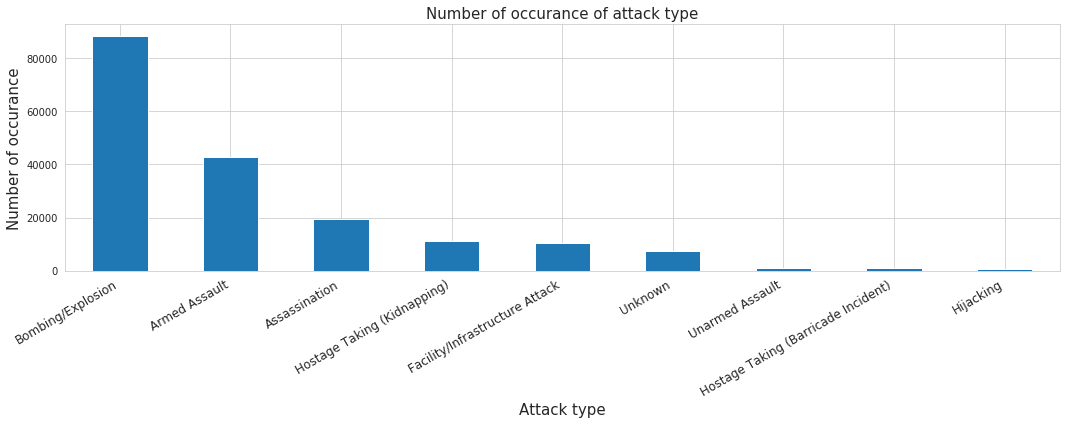

In [0]:
# Well, that should be enough to know what type is most prefered
# Still let's just go having graph to better present it

color = sns.color_palette()
ax = gbtm_data_hdf['attacktype1_txt'].value_counts().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Attack type',fontsize=15)
ax.set_ylabel('Number of occurance',fontsize=15)
ax.set_title('Number of occurance of attack type',fontsize=15)
ax.set_xticklabels(('Bombing/Explosion', 'Armed Assault', 'Assassination',
                    'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack',
                    'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)',
                    'Hijacking'), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [0]:
gbtm_data_hdf[["region", "region_txt"]].drop_duplicates().sort_values(by='region')

,region,region_txt
1,1,North America
0,2,Central America & Caribbean
6,3,South America
4,4,East Asia
2,5,Southeast Asia
585,6,South Asia
47639,7,Central Asia
3,8,Western Europe
15,9,Eastern Europe
95,10,Middle East & North Africa


In [0]:
# Let's see what region terrorists focus the most
gbtm_data_hdf['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

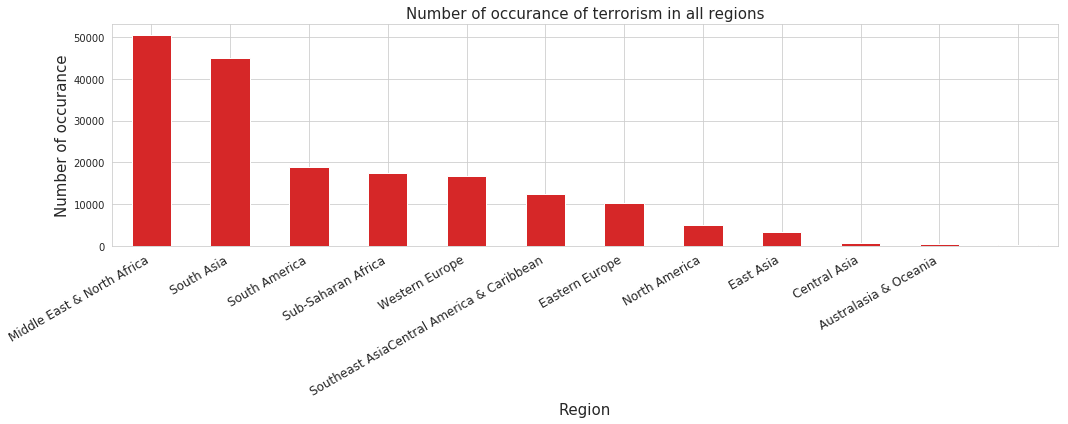

In [0]:
ax = gbtm_data_hdf['region_txt'].value_counts().plot('bar',color=color[3],figsize=(15,6))
ax.set_xlabel('Region',fontsize=15)
ax.set_ylabel('Number of occurance',fontsize=15)
ax.set_title('Number of occurance of terrorism in all regions',fontsize=15)
ax.set_xticklabels(('Middle East & North Africa', 'South Asia', 'South America',
                    'Sub-Saharan Africa', 'Western Europe', 'Southeast Asia'
                    'Central America & Caribbean', 'Eastern Europe',
                    'North America', 'East Asia', 'Central Asia', 
                    'Australasia & Oceania'), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [0]:
gbtm_data_hdf[['weaptype1', 'weaptype1_txt']].drop_duplicates().sort_values(by = 'weaptype1')

,weaptype1,weaptype1_txt
14520,1,Biological
116,2,Chemical
2342,3,Radiological
5,5,Firearms
3,6,Explosives
1325,7,Fake Weapons
4,8,Incendiary
298,9,Melee
585,10,Vehicle (not to include vehicle-borne explosiv...
314,11,Sabotage Equipment


In [0]:
gbtm_data_hdf['weaptype1_txt'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

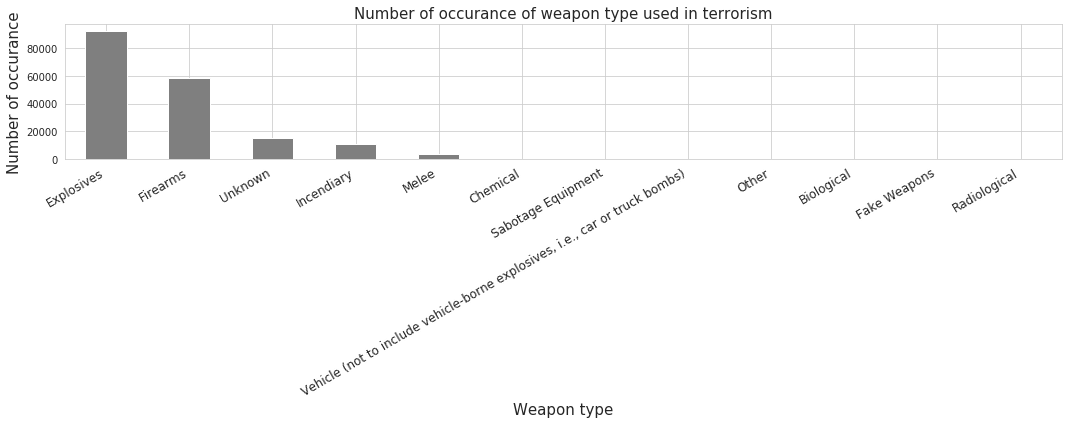

In [0]:
ax = gbtm_data_hdf['weaptype1_txt'].value_counts().plot('bar',color=color[7],figsize=(15,6))
ax.set_xlabel('Weapon type',fontsize=15)
ax.set_ylabel('Number of occurance',fontsize=15)
ax.set_title('Number of occurance of weapon type used in terrorism',fontsize=15)
ax.set_xticklabels(('Explosives', 'Firearms', 'Unknown',
                    'Incendiary', 'Melee', 'Chemical', 'Sabotage Equipment',
                    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
                    'Other', 'Biological', 'Fake Weapons', 
                    'Radiological'), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [0]:
# Explosives is the most prefered weapons, maybe because it bring great destruction power
# This may related to number of victim kills and wounds
# Let's find out
casualties_data = gbtm_data_hdf[['nkill', 'nwound','attacktype1','attacktype1_txt']]
casualties_data.isna().sum()

nkill              10313
nwound             16311
attacktype1            0
attacktype1_txt        0
dtype: int64

In [0]:
# Well compare to around 180000 records, the number could be said to be relative small
# It's much better if we could fill these missing data
# However, these 2 fields require accurate data which we can not hope to collect and fill
# Better drop all these values
casualties_data_nona = casualties_data.dropna()

In [0]:
# check again
casualties_data_nona.isna().sum()

nkill              0
nwound             0
attacktype1        0
attacktype1_txt    0
dtype: int64

In [0]:
# Let's make a pivot table which will summarize number of casualties based on attack types
casualties_kill_summarize = casualties_data_nona.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
casualties_kill_summarize

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,135393.0,23355.0,142490.0,2582.0,3646.0,3525.0,14133.0,796.0,25354.0


In [0]:
casualties_wound_summarize = casualties_data_nona.pivot_table(columns='attacktype1_txt', values='nwound', aggfunc='sum')
casualties_wound_summarize

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nwound,76993.0,13854.0,371743.0,3711.0,16996.0,3940.0,6134.0,13995.0,14252.0


In [0]:
# Let's make piechart for easier view on the statistic
!pip install plotly==4.1.0
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [0]:
labels = casualties_wound_summarize.columns
kill_values = casualties_kill_summarize.to_numpy()
wound_values = casualties_wound_summarize.to_numpy()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=kill_values[0], name="Type of attacks cause death"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=wound_values[0], name="Type of attacks cause wound"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Global Terrorism ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Death', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Wound', x=0.85, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [0]:
# We can see that both armed assault and bombing explosion make up for most of the casualties
# This must be why terrorist prefered these attack types
# One more reason is because it is easier to get their hands on these with reasonable price

In [0]:
# Upon taking close inspection on dataset, we can see some interesting field:
# number of fatalities vs number of fatalities in US
# number of non-fatalities vs number of non-fatalities in US
# Why having specific numerical value for US?
# Maybe the dataset collected by US or having some interesting facts
# Let's compare the 2
gbtm_data_hdf['nkillus'].count()/gbtm_data_hdf['nkill'].count()

0.6841309853073323

In [0]:
gbtm_data_hdf['nwoundus'].count()/gbtm_data_hdf['nwound'].count()

0.7073950900955376

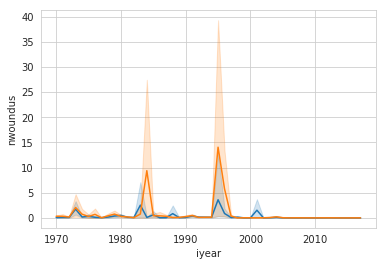

In [0]:
# Ugh seems like the occurance of fatalities and non-fatalities of US people in all terrorism activity is very high

sns.lineplot(x='iyear', y='nkillus', data=gbtm_data_hdf)
sns.lineplot(x='iyear', y='nwoundus', data=gbtm_data_hdf)

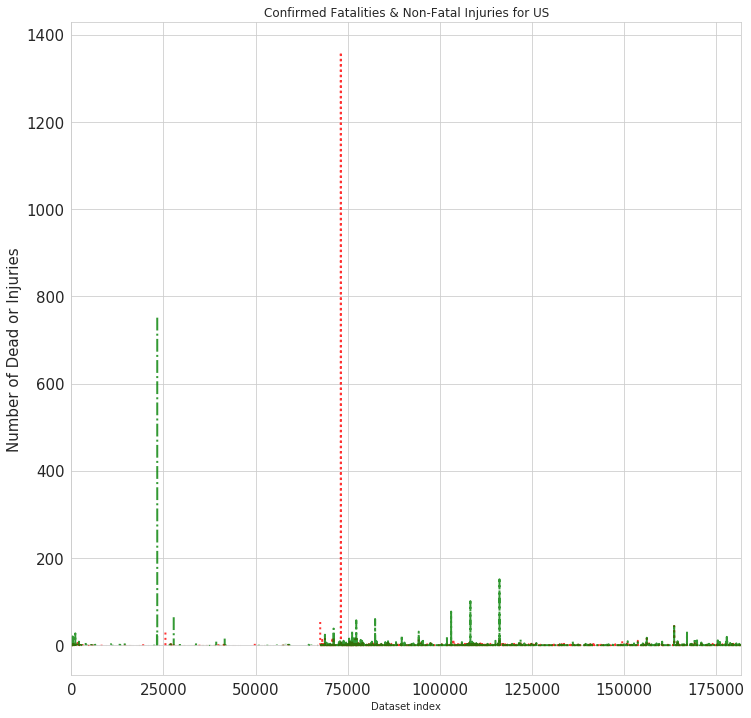

In [0]:
# Ugh nice line plot, but quite small and the number seems like average group by year
# Multiple line plot seems impossible with seaborn so let's get back to plt

gbtm_data_hdf['nkillus'].plot(kind = 'line', color = 'red', 
                           label = 'The Number of Total Confirmed Fatalities for US', 
                           linewidth = 2, alpha = 0.8, grid = True, 
                           linestyle = ':', figsize = (12,12), fontsize=15)

gbtm_data_hdf['nwoundus'].plot(kind = 'line', color = "green", 
                            label = 'The Number of Confirmed Non-Fatal Injuries for US', 
                            linewidth = 2, alpha = 0.8, grid = True, 
                            linestyle = '-.', figsize = (12,12), fontsize=15)
    
plt.xlabel('Dataset index', fontsize=10)              
plt.ylabel('Number of Dead or Injuries', fontsize=15)
plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')
plt.show()


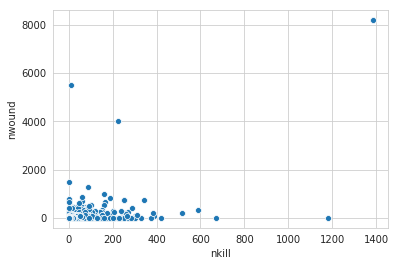

In [0]:
# Death and Injuries of all time
sns.scatterplot(x="nkill", y="nwound", data=gbtm_data_hdf)

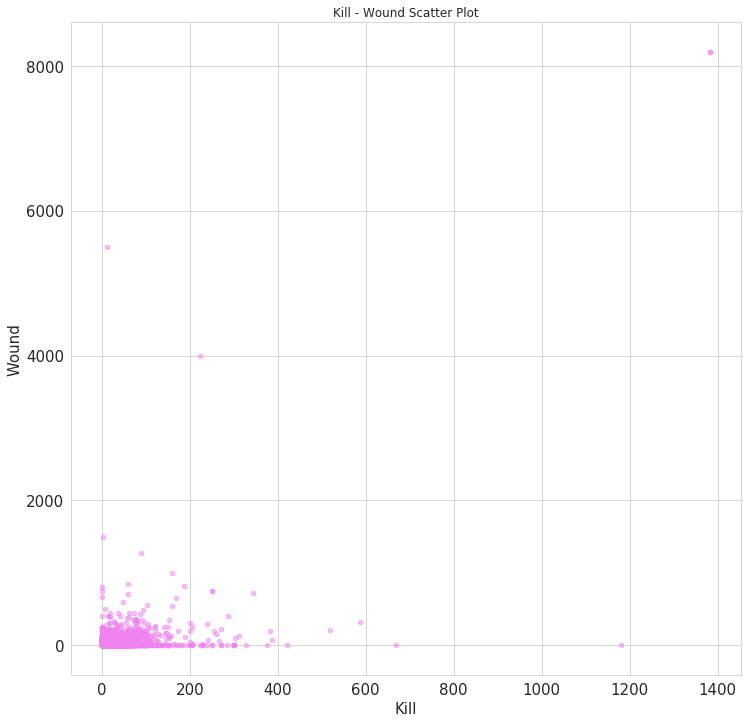

In [0]:
# Ugh the size is small and i dunno how to add label for graph
# Well get back to plt
gbtm_data_hdf.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'violet', figsize = (12,12), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

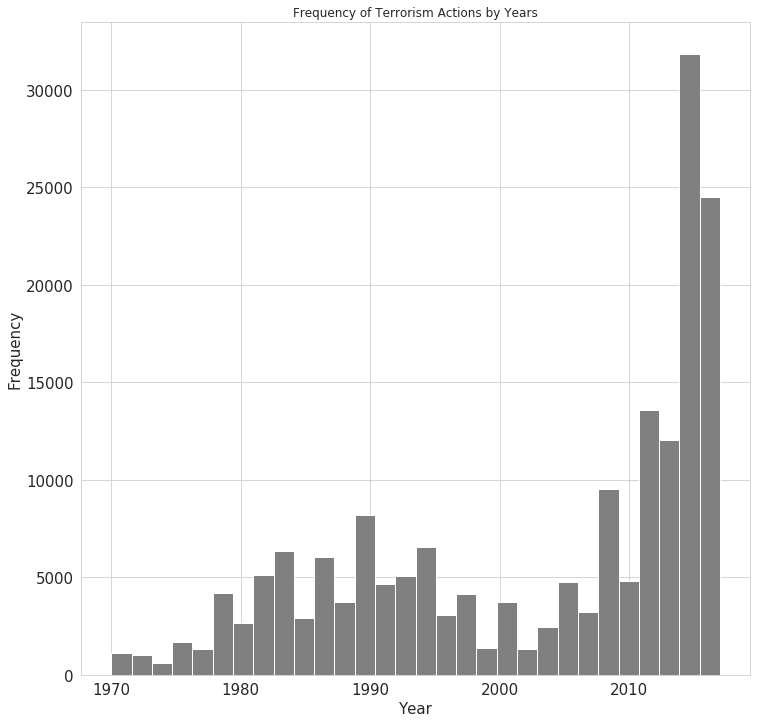

In [0]:
# Frequency of terrorism


# Histogram plot
# bins = number of bar in figure
gbtm_data_hdf['iyear'].plot(kind = 'hist', bins = 30, figsize = (12,12), color = 'gray', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Terrorism Actions by Years')
plt.show()

